# Project to create predictive model for football matches

## import the necessary libraries

In [145]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#notebook settings
pd.set_option('display.max_columns', None)

#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.compose import ColumnTransformer

## import dataset

In [146]:
data = pd.read_csv(os.path.join('..','data','prepared_football_data.csv'))

data_for_back_testing = data[['market_home_odds','market_draw_odds','market_away_odds','implied_home_win_prob','implied_draw_prob','implied_away_win_prob']]

data = data.drop(columns=['market_home_odds','market_draw_odds','market_away_odds','implied_home_win_prob','implied_draw_prob','implied_away_win_prob'])

data.head()

,home_team,away_team,full_time_result,day_of_week,month,day_of_week_sin,day_of_week_cos,month_sin,month_cos,home_roll_3_avg_home_total_goals,away_roll_3_avg_home_total_goals,home_roll_3_avg_away_total_goals,away_roll_3_avg_away_total_goals,home_roll_3_avg_home_total_shots,away_roll_3_avg_home_total_shots,home_roll_3_avg_away_total_shots,away_roll_3_avg_away_total_shots,home_roll_3_avg_home_shots_on_target,away_roll_3_avg_home_shots_on_target,home_roll_3_avg_away_shots_on_target,away_roll_3_avg_away_shots_on_target,home_roll_3_avg_home_fouls,away_roll_3_avg_home_fouls,home_roll_3_avg_away_fouls,away_roll_3_avg_away_fouls,home_roll_3_avg_home_corners,away_roll_3_avg_home_corners,home_roll_3_avg_away_corners,away_roll_3_avg_away_corners,home_roll_3_avg_home_yellow_cards,away_roll_3_avg_home_yellow_cards,home_roll_3_avg_away_yellow_cards,away_roll_3_avg_away_yellow_cards,home_roll_3_avg_home_red_cards,away_roll_3_avg_home_red_cards,home_roll_3_avg_away_red_cards,away_roll_3_avg_away_red_cards,home_roll_3_avg_home_shot_accuracy,away_roll_3_avg_home_shot_accuracy,home_roll_3_avg_away_shot_accuracy,away_roll_3_avg_away_shot_accuracy,home_roll_3_avg_home_shots_to_away_shots,away_roll_3_avg_home_shots_to_away_shots,home_roll_3_avg_home_fouls_to_away_fouls,away_roll_3_avg_home_fouls_to_away_fouls,home_roll_3_avg_away_shots_to_home_shots,away_roll_3_avg_away_shots_to_home_shots,home_roll_3_avg_away_fouls_to_home_fouls,away_roll_3_avg_away_fouls_to_home_fouls,home_roll_3_avg_goal_difference,away_roll_3_avg_goal_difference,home_roll_5_avg_home_total_goals,away_roll_5_avg_home_total_goals,home_roll_5_avg_away_total_goals,away_roll_5_avg_away_total_goals,home_roll_5_avg_home_total_shots,away_roll_5_avg_home_total_shots,home_roll_5_avg_away_total_shots,away_roll_5_avg_away_total_shots,home_roll_5_avg_home_shots_on_target,away_roll_5_avg_home_shots_on_target,home_roll_5_avg_away_shots_on_target,away_roll_5_avg_away_shots_on_target,home_roll_5_avg_home_fouls,away_roll_5_avg_home_fouls,home_roll_5_avg_away_fouls,away_roll_5_avg_away_fouls,home_roll_5_avg_home_corners,away_roll_5_avg_home_corners,home_roll_5_avg_away_corners,away_roll_5_avg_away_corners,home_roll_5_avg_home_yellow_cards,away_roll_5_avg_home_yellow_cards,home_roll_5_avg_away_yellow_cards,away_roll_5_avg_away_yellow_cards,home_roll_5_avg_home_red_cards,away_roll_5_avg_home_red_cards,home_roll_5_avg_away_red_cards,away_roll_5_avg_away_red_cards,home_roll_5_avg_home_shot_accuracy,away_roll_5_avg_home_shot_accuracy,home_roll_5_avg_away_shot_accuracy,away_roll_5_avg_away_shot_accuracy,home_roll_5_avg_home_shots_to_away_shots,away_roll_5_avg_home_shots_to_away_shots,home_roll_5_avg_home_fouls_to_away_fouls,away_roll_5_avg_home_fouls_to_away_fouls,home_roll_5_avg_away_shots_to_home_shots,away_roll_5_avg_away_shots_to_home_shots,home_roll_5_avg_away_fouls_to_home_fouls,away_roll_5_avg_away_fouls_to_home_fouls,home_roll_5_avg_goal_difference,away_roll_5_avg_goal_difference,home_roll_10_avg_home_total_goals,away_roll_10_avg_home_total_goals,home_roll_10_avg_away_total_goals,away_roll_10_avg_away_total_goals,home_roll_10_avg_home_total_shots,away_roll_10_avg_home_total_shots,home_roll_10_avg_away_total_shots,away_roll_10_avg_away_total_shots,home_roll_10_avg_home_shots_on_target,away_roll_10_avg_home_shots_on_target,home_roll_10_avg_away_shots_on_target,away_roll_10_avg_away_shots_on_target,home_roll_10_avg_home_fouls,away_roll_10_avg_home_fouls,home_roll_10_avg_away_fouls,away_roll_10_avg_away_fouls,home_roll_10_avg_home_corners,away_roll_10_avg_home_corners,home_roll_10_avg_away_corners,away_roll_10_avg_away_corners,home_roll_10_avg_home_yellow_cards,away_roll_10_avg_home_yellow_cards,home_roll_10_avg_away_yellow_cards,away_roll_10_avg_away_yellow_cards,home_roll_10_avg_home_red_cards,away_roll_10_avg_home_red_cards,home_roll_10_avg_away_red_cards,away_roll_10_avg_away_red_cards,home_roll_10_avg_home_shot_accuracy,away_roll_10_avg_home_shot_accuracy,home_roll_10_avg_away_shot_accuracy,away

# EDA (Exploratory Dataset Analysis)

## Dealing with missing values

In [147]:
# checking for null values
data.isnull().sum().any()

np.False_

## Dealing with duplicated values

In [148]:
# checking for duplicates
data.duplicated().sum()

np.int64(16)

## Uniques

In [149]:
data.nunique()

home_team                                      44
away_team                                      44
full_time_result                                3
day_of_week                                     7
month                                          12
                                             ... 
away_roll_10_avg_away_fouls_to_home_fouls    3372
home_roll_10_avg_goal_difference               56
away_roll_10_avg_goal_difference               48
home_cumulative_points                         56
away_cumulative_points                         49
Length: 137, dtype: int64

## Data type information

In [150]:
data.dtypes

home_team                                     object
away_team                                     object
full_time_result                              object
day_of_week                                    int64
month                                          int64
                                              ...   
away_roll_10_avg_away_fouls_to_home_fouls    float64
home_roll_10_avg_goal_difference             float64
away_roll_10_avg_goal_difference             float64
home_cumulative_points                         int64
away_cumulative_points                         int64
Length: 137, dtype: object

## Check for outliers

In [151]:
data.describe()

,day_of_week,month,day_of_week_sin,day_of_week_cos,month_sin,month_cos,home_roll_3_avg_home_total_goals,away_roll_3_avg_home_total_goals,home_roll_3_avg_away_total_goals,away_roll_3_avg_away_total_goals,home_roll_3_avg_home_total_shots,away_roll_3_avg_home_total_shots,home_roll_3_avg_away_total_shots,away_roll_3_avg_away_total_shots,home_roll_3_avg_home_shots_on_target,away_roll_3_avg_home_shots_on_target,home_roll_3_avg_away_shots_on_target,away_roll_3_avg_away_shots_on_target,home_roll_3_avg_home_fouls,away_roll_3_avg_home_fouls,home_roll_3_avg_away_fouls,away_roll_3_avg_away_fouls,home_roll_3_avg_home_corners,away_roll_3_avg_home_corners,home_roll_3_avg_away_corners,away_roll_3_avg_away_corners,home_roll_3_avg_home_yellow_cards,away_roll_3_avg_home_yellow_cards,home_roll_3_avg_away_yellow_cards,away_roll_3_avg_away_yellow_cards,home_roll_3_avg_home_red_cards,away_roll_3_avg_home_red_cards,home_roll_3_avg_away_red_cards,away_roll_3_avg_away_red_cards,home_roll_3_avg_home_shot_accuracy,away_roll_3_avg_home_shot_accuracy,home_roll_3_avg_away_shot_accuracy,away_roll_3_avg_away_shot_accuracy,home_roll_3_avg_home_shots_to_away_shots,away_roll_3_avg_home_shots_to_away_shots,home_roll_3_avg_home_fouls_to_away_fouls,away_roll_3_avg_home_fouls_to_away_fouls,home_roll_3_avg_away_shots_to_home_shots,away_roll_3_avg_away_shots_to_home_shots,home_roll_3_avg_away_fouls_to_home_fouls,away_roll_3_avg_away_fouls_to_home_fouls,home_roll_3_avg_goal_difference,away_roll_3_avg_goal_difference,home_roll_5_avg_home_total_goals,away_roll_5_avg_home_total_goals,home_roll_5_avg_away_total_goals,away_roll_5_avg_away_total_goals,home_roll_5_avg_home_total_shots,away_roll_5_avg_home_total_shots,home_roll_5_avg_away_total_shots,away_roll_5_avg_away_total_shots,home_roll_5_avg_home_shots_on_target,away_roll_5_avg_home_shots_on_target,home_roll_5_avg_away_shots_on_target,away_roll_5_avg_away_shots_on_target,home_roll_5_avg_home_fouls,away_roll_5_avg_home_fouls,home_roll_5_avg_away_fouls,away_roll_5_avg_away_fouls,home_roll_5_avg_home_corners,away_roll_5_avg_home_corners,home_roll_5_avg_away_corners,away_roll_5_avg_away_corners,home_roll_5_avg_home_yellow_cards,away_roll_5_avg_home_yellow_cards,home_roll_5_avg_away_yellow_cards,away_roll_5_avg_away_yellow_cards,home_roll_5_avg_home_red_cards,away_roll_5_avg_home_red_cards,home_roll_5_avg_away_red_cards,away_roll_5_avg_away_red_cards,home_roll_5_avg_home_shot_accuracy,away_roll_5_avg_home_shot_accuracy,home_roll_5_avg_away_shot_accuracy,away_roll_5_avg_away_shot_accuracy,home_roll_5_avg_home_shots_to_away_shots,away_roll_5_avg_home_shots_to_away_shots,home_roll_5_avg_home_fouls_to_away_fouls,away_roll_5_avg_home_fouls_to_away_fouls,home_roll_5_avg_away_shots_to_home_shots,away_roll_5_avg_away_shots_to_home_shots,home_roll_5_avg_away_fouls_to_home_fouls,away_roll_5_avg_away_fouls_to_home_fouls,home_roll_5_avg_goal_difference,away_roll_5_avg_goal_difference,home_roll_10_avg_home_total_goals,away_roll_10_avg_home_total_goals,home_roll_10_avg_away_total_goals,away_roll_10_avg_away_total_goals,home_roll_10_avg_home_total_shots,away_roll_10_avg_home_total_shots,home_roll_10_avg_away_total_shots,away_roll_10_avg_away_total_shots,home_roll_10_avg_home_shots_on_target,away_roll_10_avg_home_shots_on_target,home_roll_10_avg_away_shots_on_target,away_roll_10_avg_away_shots_on_target,home_roll_10_avg_home_fouls,away_roll_10_avg_home_fouls,home_roll_10_avg_away_fouls,away_roll_10_avg_away_fouls,home_roll_10_avg_home_corners,away_roll_10_avg_home_corners,home_roll_10_avg_away_corners,away_roll_10_avg_away_corners,home_roll_10_avg_home_yellow_cards,away_roll_10_avg_home_yellow_cards,home_roll_10_avg_away_yellow_cards,away_roll_10_avg_away_yellow_cards,home_roll_10_avg_home_red_cards,away_roll_10_avg_home_red_cards,home_roll_10_avg_away_red_cards,away_roll_10_avg_away_red_cards,home_roll_10_avg_home_shot_accuracy,away_roll_10_avg_home_shot_accuracy,home_roll_10_avg_away_shot_accuracy,away_roll_10_avg_away_shot_accuracy,home_

In [152]:
data.shape

(7320, 137)

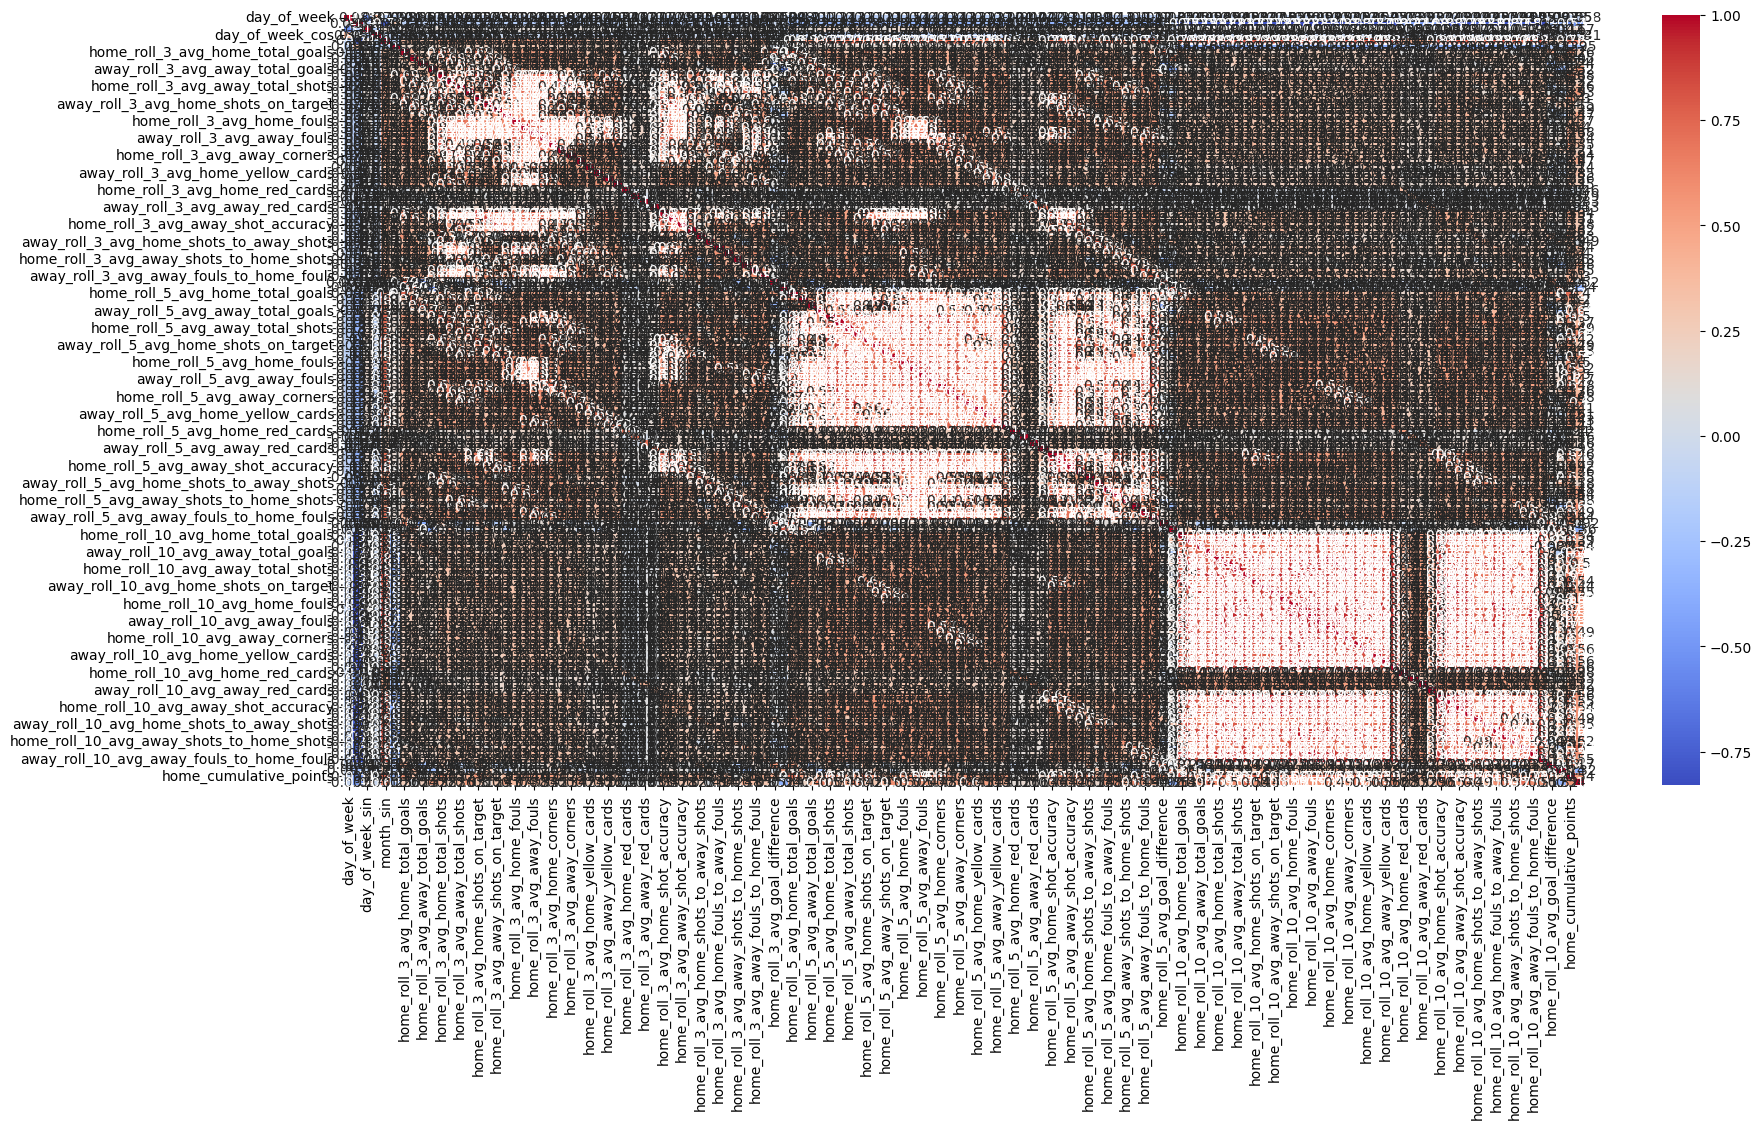

In [153]:
# check for highly correlated numerical features

# Select only numerical features
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [154]:
# Compute the absolute correlation matrix
#corr_matrix = numerical_data.corr().abs()  # Compute and take absolute values to consider only magnitude of correlation

# Identify highly correlated features (threshold of 0.7)
#highly_correlated = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                     #.stack()
                     #.sort_values(ascending=False))
#highly_correlated = highly_correlated[highly_correlated > 0.7]

# Display summary
#print(f"We have {len(highly_correlated)} pairs of highly correlated features with a correlation of more than 0.7\n")
#print("Current total number of features:", len(data.columns))
#display(highly_correlated)

# Drop the first feature in each pair of highly correlated features
#data = data.drop(columns=highly_correlated.index.get_level_values(0).unique())

# Check the new number of features
#print("New total number of features:", len(data.columns))

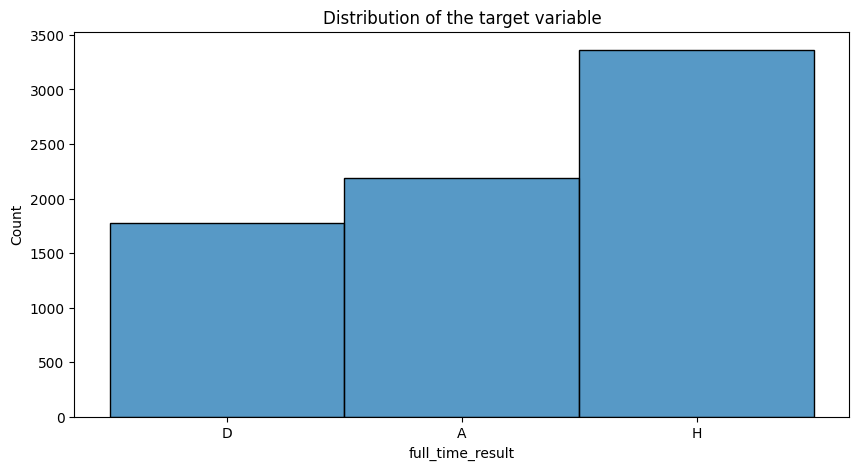

In [155]:
# show the distribution of the target variable
plt.figure(figsize=(10,5))
sns.histplot(data['full_time_result'])
plt.title('Distribution of the target variable')
plt.show()

In [156]:
#def plot_numerical_features(data):
    #X_num = data.select_dtypes(exclude='object')
    
    #for numerical_feature in X_num.columns:
        
        ## Creating three subplots per numerical_feature
        #fig, ax =plt.subplots(1,2,figsize=(15,3))
        
        ## Histogram to get an overview of the distribution of each numerical_feature
        #ax[0].set_title(f"Distribution of: {numerical_feature}")
        #sns.histplot(data = X_num, x = numerical_feature, kde=True, ax = ax[0])
        
        ## Boxplot to detect outliers
        #ax[1].set_title(f"Boxplot of: {numerical_feature}")
        #sns.boxplot(data = X_num, x = numerical_feature, ax=ax[1])

- The histogram with the estimated density shows us that *the distribution of the features if is quite skewed and non-Gaussian*
- The boxplot indicates some potential outliers.

In [157]:
#plot_numerical_features(data=data)

In [158]:
# defining the target variable
y = data['full_time_result']
X = data.drop('full_time_result', axis=1)

# building a pipeline to preprocess the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# numerical features
numerical_features = X.select_dtypes(exclude='object').columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# categorical features
categorical_features = X.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['day_of_week', 'month', 'day_of_week_sin', 'day_of_week_cos',
       'month_sin', 'month_cos', 'home_roll_3_avg_home_total_goals',
       'away_roll_3_avg_home_total_goals', 'home_roll_3_avg_away_total_goals',
       'away_roll_3_avg_away_total_goals',
       ...
       'home_roll_10_avg_home_fouls_to_a...
       'home_roll_10_avg_away_fouls_to_home_fouls',
       'away_roll_10_avg_away_fouls_to_home_fouls',
       'home_roll_10_avg_goal_difference', 'away_roll_10_avg_goal_difference',
       'home_cumulative_points', 'away_cumulative_points'],
      dtype='object', length=134)),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['home_team', 'away_team'], dtype='object'))])

In [159]:
X.head()

,home_team,away_team,day_of_week,month,day_of_week_sin,day_of_week_cos,month_sin,month_cos,home_roll_3_avg_home_total_goals,away_roll_3_avg_home_total_goals,home_roll_3_avg_away_total_goals,away_roll_3_avg_away_total_goals,home_roll_3_avg_home_total_shots,away_roll_3_avg_home_total_shots,home_roll_3_avg_away_total_shots,away_roll_3_avg_away_total_shots,home_roll_3_avg_home_shots_on_target,away_roll_3_avg_home_shots_on_target,home_roll_3_avg_away_shots_on_target,away_roll_3_avg_away_shots_on_target,home_roll_3_avg_home_fouls,away_roll_3_avg_home_fouls,home_roll_3_avg_away_fouls,away_roll_3_avg_away_fouls,home_roll_3_avg_home_corners,away_roll_3_avg_home_corners,home_roll_3_avg_away_corners,away_roll_3_avg_away_corners,home_roll_3_avg_home_yellow_cards,away_roll_3_avg_home_yellow_cards,home_roll_3_avg_away_yellow_cards,away_roll_3_avg_away_yellow_cards,home_roll_3_avg_home_red_cards,away_roll_3_avg_home_red_cards,home_roll_3_avg_away_red_cards,away_roll_3_avg_away_red_cards,home_roll_3_avg_home_shot_accuracy,away_roll_3_avg_home_shot_accuracy,home_roll_3_avg_away_shot_accuracy,away_roll_3_avg_away_shot_accuracy,home_roll_3_avg_home_shots_to_away_shots,away_roll_3_avg_home_shots_to_away_shots,home_roll_3_avg_home_fouls_to_away_fouls,away_roll_3_avg_home_fouls_to_away_fouls,home_roll_3_avg_away_shots_to_home_shots,away_roll_3_avg_away_shots_to_home_shots,home_roll_3_avg_away_fouls_to_home_fouls,away_roll_3_avg_away_fouls_to_home_fouls,home_roll_3_avg_goal_difference,away_roll_3_avg_goal_difference,home_roll_5_avg_home_total_goals,away_roll_5_avg_home_total_goals,home_roll_5_avg_away_total_goals,away_roll_5_avg_away_total_goals,home_roll_5_avg_home_total_shots,away_roll_5_avg_home_total_shots,home_roll_5_avg_away_total_shots,away_roll_5_avg_away_total_shots,home_roll_5_avg_home_shots_on_target,away_roll_5_avg_home_shots_on_target,home_roll_5_avg_away_shots_on_target,away_roll_5_avg_away_shots_on_target,home_roll_5_avg_home_fouls,away_roll_5_avg_home_fouls,home_roll_5_avg_away_fouls,away_roll_5_avg_away_fouls,home_roll_5_avg_home_corners,away_roll_5_avg_home_corners,home_roll_5_avg_away_corners,away_roll_5_avg_away_corners,home_roll_5_avg_home_yellow_cards,away_roll_5_avg_home_yellow_cards,home_roll_5_avg_away_yellow_cards,away_roll_5_avg_away_yellow_cards,home_roll_5_avg_home_red_cards,away_roll_5_avg_home_red_cards,home_roll_5_avg_away_red_cards,away_roll_5_avg_away_red_cards,home_roll_5_avg_home_shot_accuracy,away_roll_5_avg_home_shot_accuracy,home_roll_5_avg_away_shot_accuracy,away_roll_5_avg_away_shot_accuracy,home_roll_5_avg_home_shots_to_away_shots,away_roll_5_avg_home_shots_to_away_shots,home_roll_5_avg_home_fouls_to_away_fouls,away_roll_5_avg_home_fouls_to_away_fouls,home_roll_5_avg_away_shots_to_home_shots,away_roll_5_avg_away_shots_to_home_shots,home_roll_5_avg_away_fouls_to_home_fouls,away_roll_5_avg_away_fouls_to_home_fouls,home_roll_5_avg_goal_difference,away_roll_5_avg_goal_difference,home_roll_10_avg_home_total_goals,away_roll_10_avg_home_total_goals,home_roll_10_avg_away_total_goals,away_roll_10_avg_away_total_goals,home_roll_10_avg_home_total_shots,away_roll_10_avg_home_total_shots,home_roll_10_avg_away_total_shots,away_roll_10_avg_away_total_shots,home_roll_10_avg_home_shots_on_target,away_roll_10_avg_home_shots_on_target,home_roll_10_avg_away_shots_on_target,away_roll_10_avg_away_shots_on_target,home_roll_10_avg_home_fouls,away_roll_10_avg_home_fouls,home_roll_10_avg_away_fouls,away_roll_10_avg_away_fouls,home_roll_10_avg_home_corners,away_roll_10_avg_home_corners,home_roll_10_avg_away_corners,away_roll_10_avg_away_corners,home_roll_10_avg_home_yellow_cards,away_roll_10_avg_home_yellow_cards,home_roll_10_avg_away_yellow_cards,away_roll_10_avg_away_yellow_cards,home_roll_10_avg_home_red_cards,away_roll_10_avg_home_red_cards,home_roll_10_avg_away_red_cards,away_roll_10_avg_away_red_cards,home_roll_10_avg_home_shot_accuracy,away_roll_10_avg_home_shot_accuracy,home_roll_10_avg_away_shot_accuracy,away_roll_10_avg_away

In [160]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5856, 136), (1464, 136), (5856,), (1464,))

In [172]:
%%time

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# Set up RandomForestClassifier as the estimator
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# First feature selection with SelectKBest
#select_k_best = SelectKBest(f_classif, k=30)

# RFECV setup with RandomForestClassifier
rfecv = RFECV(estimator=rf,
              step=1, 
              cv=3, 
              scoring='accuracy',
              n_jobs=-1)

# Build the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('initial_selection', select_k_best),
    ('feature_selection', rfecv),  # Use RFECV here
    ('classifier', rf)
])

# Fit the pipeline (including feature selection)
print("Starting model training with RFECV for feature selection...")
pipeline.fit(X_train, y_train)
print("Model training complete.")

# Access RFECV attributes for selected features
selected_features = rfecv.support_  # Boolean mask of selected features
feature_ranking = rfecv.ranking_    # Ranking of features (1 means selected)

# Print selected features information
print(f"\nRFECV selected {selected_features.sum()} features out of {len(selected_features)} total features.")
print("Feature rankings (1 indicates selected features):")
print(feature_ranking)

# Making predictions
print("\nMaking predictions on the test set...")
y_pred = pipeline.predict(X_test)

# Evaluating the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: if you want to print the selected feature names, assuming preprocessor is a ColumnTransformer
try:
    # Get feature names after preprocessing
    feature_names = preprocessor.get_feature_names_out()  # Feature names after transformation
    
    # Check and adjust for length mismatch
    if len(feature_names) > len(selected_features):
        feature_names = feature_names[:len(selected_features)]
    
    # Get names of selected features
    selected_feature_names = [feature_names[i] for i in range(len(selected_features)) if selected_features[i]]
    
    print("\nSelected Feature Names after RFECV:")
    print(selected_feature_names)
except AttributeError:
    print("\nFeature names could not be extracted. Ensure the preprocessor is a ColumnTransformer with feature names available.")

Starting model training with RFECV for feature selection...
Model training complete.

RFECV selected 11 features out of 222 total features.
Feature rankings (1 indicates selected features):
[ 49  47 111  97 101  78  57  68  73  71   7  11  14  18  26  36  44  38
  20  33  31  17  30  13  27  23  66  61  52  54 143 149 137 138   1   1
   9   8   1   1   1   1   1   1   2   5  21  22  81  83  84  77  16  28
  37  34  63  60  53  65  59  58  41  55  50  46  43  48  79  74  80  70
 155 151 139 135  32  19  29  42   1   6  25  15   3   4  12  10  45  39
  67 108 112 100  56  87  89  69  98 103 105 106  90  99  96  94  86  88
  93  91 110 104 109 107 156 159 148 160  85  95  92 102  24  51  75  76
  64  35  72  82  40  62   1   1 120 133 185 164 205 179 176 192 146 172
 193 204 121 168 212 129 134 200 174 206 194 158 125 209 114 122 167 124
 173 187 182 183 188 198 141 152 142 163 117 161 140 130 165 154 116 131
 184 162 207 180 177 196 166 169 202 203 113 145 211 115 132 201 181 208
 195 17

In [173]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['day_of_week', 'month', 'day_of_week_sin', 'day_of_week_cos',
       'month_sin', 'month_cos', 'home_roll_3_avg_home_total_goals',
       'away_roll_3_avg_home_total_goals', 'home_roll_3_avg_away_total_goals',
       'away_roll_3_avg_away_total_goals',
       ...
       '...
      dtype='object', length=134)),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['home_team', 'away_team'], dtype='object'))])),
                ('feature_selection',
                 RFECV(cv=3,
                       estimator=RandomForestClassifier(class_weight='balanced',
                                                        random_state=42),
                       n_jobs=-1, scoring='accuracy')),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [174]:
# After fitting the model, access the classifier within the pipeline
classifier = pipeline.named_steps['classifier']

# Get feature importances from the classifier
importances = classifier.feature_importances_

# Access all feature names from the preprocessor
try:
    # Get feature names after preprocessing
    all_feature_names = preprocessor.get_feature_names_out()

    # Ensure the length of selected features aligns with preprocessed features
    if len(selected_features) != len(all_feature_names):
        # Align lengths by using only the first part of the names if a mismatch exists
        all_feature_names = all_feature_names[:len(selected_features)]

    # Filter only the selected feature names based on the RFECV selection mask
    selected_feature_names = [all_feature_names[i] for i, is_selected in enumerate(selected_features) if is_selected]
    
    # Combine selected feature names with their importances into a DataFrame
    importance_df = pd.DataFrame({
        'Feature': selected_feature_names,
        'Importance': importances
    })

    # Sort by importance (from highest to lowest)
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the sorted importance DataFrame
    print("\nFeature Importances of Selected Features:")
    display(importance_df)
    
except AttributeError:
    print("\nCould not retrieve feature names. Ensure the preprocessor is a ColumnTransformer with feature names available.")


Feature Importances of Selected Features:


,Feature,Importance
10,num__away_cumulative_points,0.169467
9,num__home_cumulative_points,0.169332
3,num__away_roll_3_avg_home_shots_to_away_shots,0.077444
2,num__home_roll_3_avg_home_shots_to_away_shots,0.075395
7,num__away_roll_3_avg_away_shots_to_home_shots,0.075145
6,num__home_roll_3_avg_away_shots_to_home_shots,0.074138
8,num__home_roll_5_avg_home_shots_to_away_shots,0.073627
4,num__home_roll_3_avg_home_fouls_to_away_fouls,0.072089
5,num__away_roll_3_avg_home_fouls_to_away_fouls,0.071377
0,num__home_roll_3_avg_home_shot_accuracy,0.071259


In [175]:
# saving the model
import joblib

# Save the model as a pickle file
filename = os.path.join('..','models','football_model.pkl')
joblib.dump(pipeline, filename)

['../models/football_model.pkl']

In [177]:
# load the model
# Load the model from the file
loaded_model = joblib.load(filename)

# Check the model object type after loading
print(f"Model type after loading: {type(loaded_model)}")

# Make predictions using the loaded model
print("\nMaking predictions using the loaded model...")
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_loaded))

# Check if the predictions from the original model and the loaded model are the same
print("\nPredictions from original model and loaded model are the same:", np.array_equal(y_pred, y_pred_loaded))

Model type after loading: <class 'sklearn.pipeline.Pipeline'>

Making predictions using the loaded model...

Classification Report:
              precision    recall  f1-score   support

           A       0.64      0.70      0.67       437
           D       0.53      0.19      0.28       354
           H       0.66      0.85      0.74       673

    accuracy                           0.64      1464
   macro avg       0.61      0.58      0.56      1464
weighted avg       0.62      0.64      0.61      1464


Predictions from original model and loaded model are the same: True


In [204]:
# what are the probability of the model predicting the target variable
y_pred_proba = loaded_model.predict_proba(X_test)
display(y_pred_proba)

# what are the team names that goint to win
y_pred = loaded_model.predict(X_test)
display(y_pred)

array([[0.25, 0.09, 0.66],
       [0.63, 0.15, 0.22],
       [0.25, 0.48, 0.27],
       ...,
       [0.05, 0.33, 0.62],
       [0.71, 0.13, 0.16],
       [0.  , 0.  , 1.  ]])

array(['H', 'A', 'D', ..., 'H', 'A', 'H'], dtype=object)

array(['H', 'A', 'D', ..., 'H', 'A', 'H'], dtype=object)

In [201]:
data_for_back_testing.head()

,market_home_odds,market_draw_odds,market_away_odds,implied_home_win_prob,implied_draw_prob,implied_away_win_prob
0,2.30,3.25,3.00,0.404145,0.286010,0.309845
1,5.00,3.40,1.72,0.185958,0.273467,0.540575
2,2.37,3.25,2.87,0.391387,0.285412,0.323201
3,1.72,3.40,5.00,0.540575,0.273467,0.185958
4,2.87,3.20,2.40,0.323341,0.289997,0.386662


In [218]:
y_pred_proba

array([[0.25, 0.09, 0.66],
       [0.63, 0.15, 0.22],
       [0.25, 0.48, 0.27],
       ...,
       [0.05, 0.33, 0.62],
       [0.71, 0.13, 0.16],
       [0.  , 0.  , 1.  ]])

In [257]:
# Create a DataFrame to store team names and y_true values
team_names = X_test.loc[:, ['home_team', 'away_team']].copy()

#add the tru labels
team_names['true_predictions'] = y_test

# Add predicted results (H, A, D) to the team_names DataFrame
team_names['predicted_results'] = y_pred


# Unpack y_pred_proba (probabilities for [Away, Draw, Home])
team_names[['away_prob', 'draw_prob', 'home_prob']] = pd.DataFrame(y_pred_proba, index=team_names.index)

# Ensure index alignment between team_names and data_for_back_testing for implied probabilities
team_names[['implied_home_win_prob', 'implied_draw_prob', 'implied_away_win_prob']] = data_for_back_testing.loc[team_names.index, ['implied_home_win_prob', 'implied_draw_prob', 'implied_away_win_prob']]

# Reorder columns for better readability
team_names = team_names[['home_team', 'away_team', 'true_predictions','predicted_results', 
                         'home_prob', 'draw_prob', 'away_prob', 
                         'implied_home_win_prob', 'implied_draw_prob', 
                         'implied_away_win_prob']]


# Print column names to ensure everything is added correctly
print(team_names.columns)

# Display the first few rows of the DataFrame
team_names.head()

Index(['home_team', 'away_team', 'true_predictions', 'predicted_results',
       'home_prob', 'draw_prob', 'away_prob', 'implied_home_win_prob',
       'implied_draw_prob', 'implied_away_win_prob'],
      dtype='object')


,home_team,away_team,true_predictions,predicted_results,home_prob,draw_prob,away_prob,implied_home_win_prob,implied_draw_prob,implied_away_win_prob
1516,man city,bolton,H,H,0.66,0.09,0.25,0.547479,0.263094,0.189428
3967,swansea,west ham,D,A,0.22,0.15,0.63,0.463799,0.286464,0.249738
2350,liverpool,man united,D,D,0.27,0.48,0.25,0.316547,0.287770,0.395683
4294,stoke,bournemouth,A,H,0.46,0.38,0.16,0.425000,0.287500,0.287500
2960,sunderland,man united,A,A,0.12,0.22,0.66,0.162963,0.244444,0.592593


In [ ]:
# Define a function to calculate the Brier score
def calculate_brier_score(predictions, true_outcome):
    return np.mean((predictions - true_outcome) ** 2)

# Assuming you have the following DataFrame as `team_names`
# Add the one-hot encoded true predictions as a new column based on 'true_predictions'
def one_hot_encode(result):
    # 'H' = [1, 0, 0], 'D' = [0, 1, 0], 'A' = [0, 0, 1]
    if result == 'H':
        return [1, 0, 0]
    elif result == 'D':
        return [0, 1, 0]
    elif result == 'A':
        return [0, 0, 1]

team_names['true_predictions_brier'] = team_names['true_predictions'].apply(one_hot_encode)

# Now calculate the Brier score for each row using the predicted probabilities
team_names['brier_score_market'] = team_names.apply(
    lambda row: calculate_brier_score(np.array([row['home_prob'], row['draw_prob'], row['away_prob']]), row['true_predictions_brier']),
    axis=1
)

# calculate the brier score for the model
team_names['brier_score_model'] = team_names.apply(
    lambda row: calculate_brier_score(np.array([row['implied_home_win_prob'], row['implied_draw_prob'], row['implied_away_win_prob']]), row['true_predictions_brier']),
    axis=1
)


# Optionally, calculate the average Brier score for the entire dataset
average_brier_score_market = team_names['brier_score_market'].mean()

# Optionally, calculate the average Brier score for the entire dataset
average_brier_score_model = team_names['brier_score_model'].mean()



# Display the Brier score for each row and the average Brier score
display(team_names[['home_team', 'away_team', 'true_predictions', 'predicted_results', 'brier_score_model', 'brier_score_market']])
print(f"Average Brier Score Market: {average_brier_score_market}")
print(f"Average Brier Score Model: {average_brier_score_model}")

,home_team,away_team,true_predictions,predicted_results,brier_score_model,brier_score_market
1516,man city,bolton,H,H,0.103292,0.062067
3967,swansea,west ham,D,A,0.262204,0.389267
2350,liverpool,man united,D,D,0.254680,0.135267
4294,stoke,bournemouth,A,H,0.256979,0.353867
2960,sunderland,man united,A,A,0.084097,0.059467
...,...,...,...,...,...,...
4604,newcastle,stoke,H,H,0.173412,0.000000
4068,aston villa,everton,A,A,0.119803,0.031400
7140,man city,aston villa,H,H,0.038049,0.085267
5866,wolves,everton,A,A,0.241745,0.042200


Average Brier Score: 0.1553620786537083
Average Brier Score: 0.18470692209099737
